In [1]:
import pandas as pd
df=pd.read_csv("clean_dataset.csv")
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,CngKit,Owner,DealerState,City,Warranty,Car Age,QualityScore,Price
0,22,34,4,44,33197.0,1,2,0,0,2,0,1,7,7.8,5.75
1,22,68,4,37,10322.0,1,2,1,0,2,0,1,4,8.3,4.35
2,18,111,4,6,37889.0,1,2,0,0,2,0,1,10,7.9,4.70
3,8,128,4,0,13106.0,1,2,1,0,2,0,1,5,8.1,9.90
4,12,99,1,44,104614.0,1,2,0,1,2,0,0,15,7.5,2.70


In [2]:
from sklearn.model_selection import train_test_split
x=df.drop("Price",axis=1)
y=df["Price"]

x_train,X_test,y_train,y_test=train_test_split(x,y)


from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Random Forest R2 :", r2_score(y_test, y_pred_rf))
print("MAE              :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE             :", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest R2 : 0.7660066012870262
MAE              : 1.5162326196712836
RMSE             : 2.1447068681272308


d:\Anaconda\Anaconda inatller location\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best R2 on training:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best R2 on training: 0.7273007532634075
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [4]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = best_model.predict(X_test)

print("Test R2 :", r2_score(y_test, y_pred))
print("MAE     :", mean_absolute_error(y_test, y_pred))
print("RMSE    :", mean_squared_error(y_test, y_pred, squared=False))

Test R2 : 0.7917434356273011
MAE     : 1.3966346052
RMSE    : 2.0233242634190445


d:\Anaconda\Anaconda inatller location\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


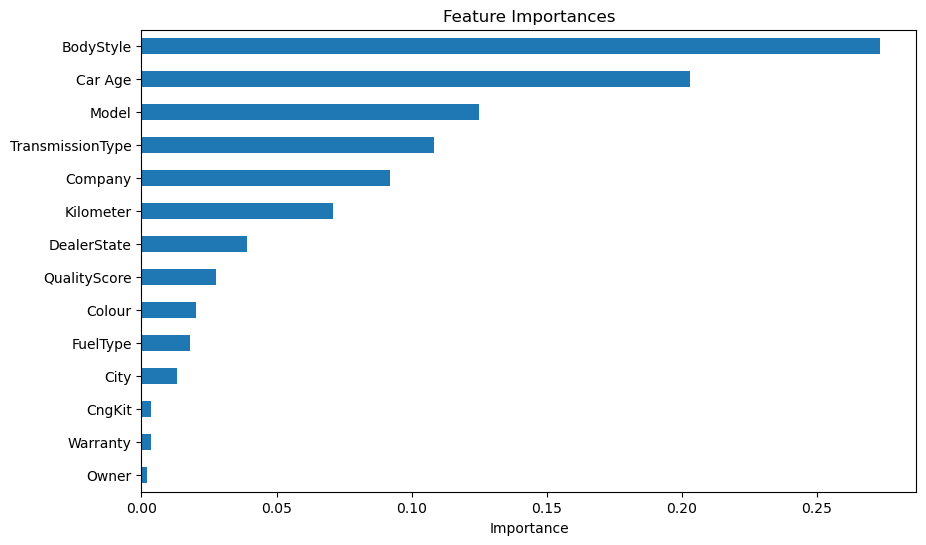

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feat_names = x.columns
importance_df = pd.Series(importances, index=feat_names).sort_values(ascending=True)

importance_df.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()

In [ ]:
low_importance = importance_df[importance_df < 0.03].index.tolist()

X_train_reduced = x_train.drop(columns=low_importance)
X_test_reduced = X_test.drop(columns=low_importance)


NameError: name 'importance_df' is not defined

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_reduced = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = rf_reduced.predict(X_test_reduced)


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2     :", r2_score(y_test, y_pred_reduced))
print("MAE    :", mean_absolute_error(y_test, y_pred_reduced))
print("RMSE   :", mean_squared_error(y_test, y_pred_reduced, squared=False))


R2     : 0.8067197197179745
MAE    : 1.3201863885999996
RMSE   : 1.9492157556670207


d:\Anaconda\Anaconda inatller location\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
import pickle
pickle.dump(rf_reduced,open("Random_Forest_Regressor_Model.pkl", "wb"))